In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)  

In [2]:
#reading dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#number of raws and columns
train.shape
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Barchart for categirical features  
Pclass  
Name  
Sibsp  
Embarked  
Sex



In [4]:
#visualisation of dependency of dependent and independent variable
def bar_chart(feature):
    survived = train.copy()[train["Survived"] == 1][feature].value_counts()
    died = train.copy()[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived,died])
    df.index = ["survived","died"]
    df.plot(kind = "bar", stacked = True)
   
    


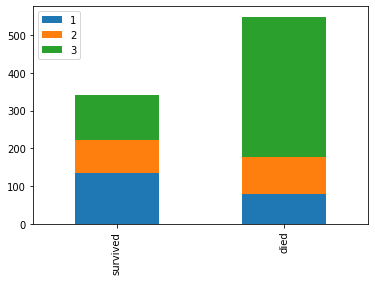

In [5]:
bar_chart("Pclass")
#more people died from Cabin 3

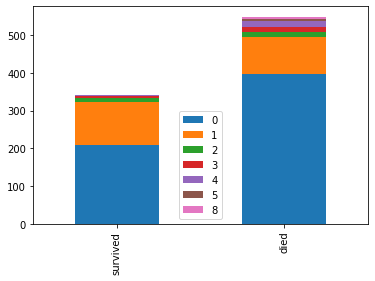

In [6]:
bar_chart('SibSp')

## Feature Engineering

In [7]:
train_test_data = [test,train]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.' , expand = False) 

In [8]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Don           1
Capt          1
Sir           1
Ms            1
Lady          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

In [9]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

### Title Map:
Mr : 0  
Miss : 1  
Mrs : 2     
Others :3


In [10]:
title_mapping = { 'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' :3, 'Dr' : 3, 'Rev' : 3 , 'Major' :3 , 'Col' : 3 ,  'Mlle' : 3  ,'Jonkheer' :3 ,'Ms' : 3,  'Countess' :3 , 'Don' :3 ,'Capt':3  ,'Mme' :3 ,'Lady':3 , 'Sir' :3 , 'Dona' : 3} 
 
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

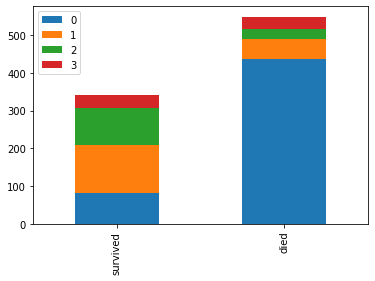

In [11]:
bar_chart('Title')

In [12]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [13]:
#droping coloumn Name
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

### Sex 
Male : 0    
Female : 1

In [14]:
Sex_mapping = { 'male' : 0 , 'female' : 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(Sex_mapping)

In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Embarked Mapping


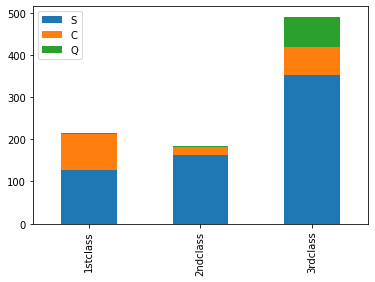

In [16]:
pclass1 = train[train["Pclass"] == 1]["Embarked"].value_counts()
pclass2 = train[train["Pclass"] == 2]["Embarked"].value_counts()
pclass3 = train[train["Pclass"] == 3]["Embarked"].value_counts()

df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ['1stclass', '2ndclass' ,'3rdclass']
df.plot(kind = 'bar', stacked = True)

#### In all the three classes most of the passengers are from 'S',   
#### So we fill missing value with 'S'

In [17]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [18]:
train['Embarked'].unique() #no more null values

array(['S', 'C', 'Q'], dtype=object)

In [19]:
emb_mapping = {'S' : 0, 'C' :1 , 'Q' : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(emb_mapping)

###### Family Size
Combining Parch and SibSp

In [20]:
train["Family Size"] = train["Parch"] + train["SibSp"] 
test["Family Size"] = test["Parch"] + test["SibSp"] 

(0, 10.0)

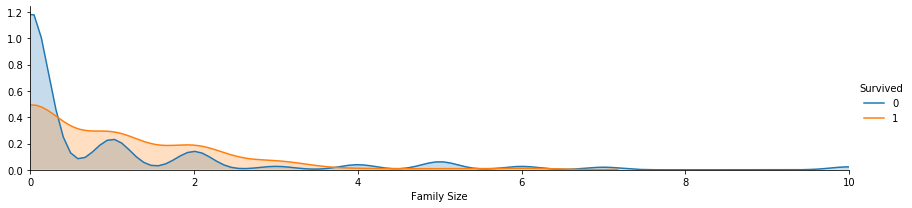

In [21]:
facet =  sns.FacetGrid(train , hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Family Size' ,shade = True)
facet.set(xlim = (0,train['Family Size'].max()))
facet.add_legend()
plt.xlim(0)


In [22]:
family_mapping = { 0 : 0 , 1 : 0.4, 2 : 0.8, 3 : 1.2 , 4 : 1.6, 5 : 2 , 6 : 2.4 ,7 : 2.8 ,8 : 3.2 ,9 : 3.6 ,  10 : 4 }

for dataset in train_test_data:
    dataset['Family Size'] = dataset['Family Size'].map(family_mapping)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,0.0


FARE

In [24]:
test['Fare'].fillna(test.groupby('Title')['Fare'].transform('median') , inplace = True)

(0.0, 512.3292)

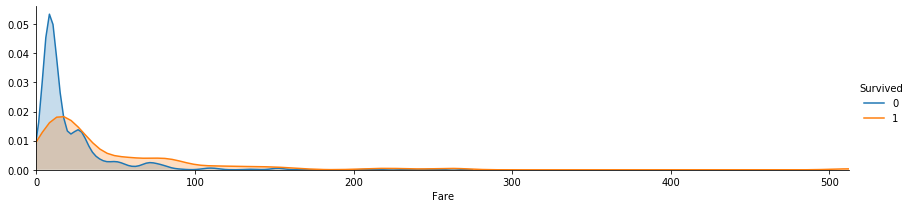

In [25]:
facet = sns.FacetGrid(train , hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare' , shade = True)
facet.set(xlim = (0 ,  train['Fare'].max()))
facet.add_legend()
plt.xlim()

(0, 40)

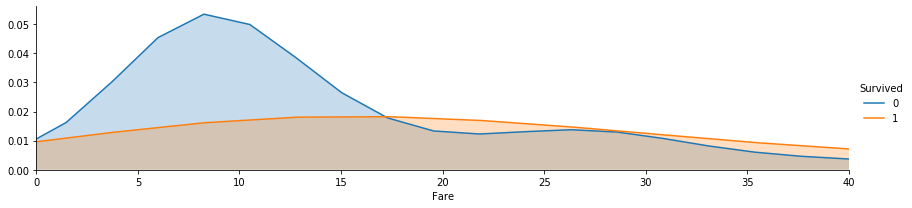

In [26]:
facet = sns.FacetGrid(train , hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare' , shade = True)
facet.set(xlim = (0 ,  train['Fare'].max()))
facet.add_legend()
plt.xlim(0,40)

for dataset in train_test_data:
    
    dataset.loc[dataset['Fare'] <=5 , 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 5) & (dataset['Fare'] <= 12), 'Fare' ] = 1,
    dataset.loc[(dataset['Fare'] > 12 ) & (dataset['Fare'] <= 16) ,'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 16 , 'Fare'] = 4


In [27]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0,
    dataset.loc[((dataset['Fare'] > 8) & (dataset['Fare'] <= 14)), 'Fare'] = 1,
    dataset.loc[((dataset['Fare'] > 14) & (dataset['Fare'] <= 31)), 'Fare']   = 2,
    dataset.loc[((dataset['Fare'] > 31) & (dataset['Fare'] <= 99)), 'Fare']   = 3,
    dataset.loc[ (dataset['Fare'] > 99), 'Fare'] = 4,
    dataset['Fare'] = dataset['Fare'].astype(int)

In [28]:
test['Fare'].value_counts()

0    119
2    104
1     87
3     77
4     31
Name: Fare, dtype: int64

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Family Size      0
dtype: int64

In [30]:
train.drop('Ticket' , axis = 1, inplace = True)
test.drop('Ticket' , axis = 1 , inplace = True)
train.drop('SibSp' , axis = 1, inplace = True)
test.drop('SibSp' , axis = 1 , inplace = True)
train.drop('Parch' , axis = 1, inplace = True)
test.drop('Parch' , axis = 1 , inplace = True)
train.drop('Cabin' , axis = 1, inplace = True)
test.drop('Cabin' , axis = 1 , inplace = True)
train.drop('PassengerId' , axis = 1, inplace = True)


#### Age.
Some age are missing, lets use median of age

In [31]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         0
Title            0
Family Size      0
dtype: int64

In [32]:
# filling missing age with median age value based on title
train['Age'].fillna(train.groupby('Title')['Age'].transform('median') , inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median') , inplace = True)

In [33]:
#test = test.dropna()

In [34]:
#test.isnull().sum()

In [35]:
#train.isnull().sum()

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family Size
0,0,3,0,22.0,0,0,0,0.4
1,1,1,1,38.0,3,1,2,0.4
2,1,3,1,26.0,0,0,1,0.0
3,1,1,1,35.0,3,0,2,0.4
4,0,3,0,35.0,1,0,0,0.0


Binning # conversion of categorical numerical value to numerical value

(0, 80.0)

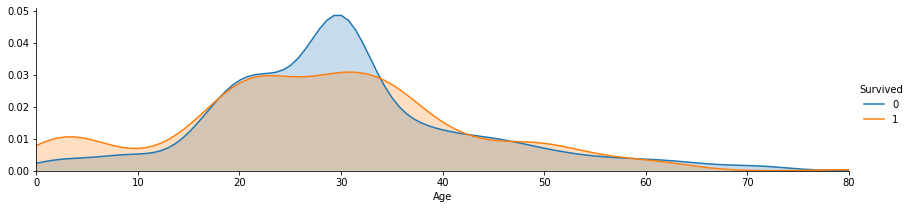

In [37]:
facet =  sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age' ,shade = True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(0)


In [38]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] < 17, 'Age'] = 0,
    dataset.loc[(dataset['Age'] >= 17) & (dataset['Age'] <= 23), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 23) & (dataset['Age'] <= 28), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 45), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 5

for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11 , 'Age'] = 0 , 
    dataset.loc[(dataset['Age'] >11 ) & (dataset['Age'] <= 18) , 'Age'] = 0.5,
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 24) , 'Age'] = 1, 
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 32) , 'Age'] = 1.5, 
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 42) , 'Age'] = 2, 
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 52) , 'Age'] = 2.5,  
    dataset.loc[dataset['Age'] >52 , 'Age'] = 3
    

In [39]:
#train['Age'].value_counts
test['Age'].value_counts()

2    118
1     94
4     76
5     52
3     39
0     39
Name: Age, dtype: int64

In [40]:
train['Age'].value_counts()

3    203
1    183
4    182
2    117
0    105
5    101
Name: Age, dtype: int64

In [41]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Family Size    0
dtype: int64

# Creating model

In [42]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [43]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data2 = sc.fit_transform(train_data)
train_data2.shape


(891, 7)

In [44]:
# using Support Vector Machine
from sklearn.svm import SVC
import numpy as np

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [46]:
clf = SVC(gamma = 'scale')
scoring = 'accuracy'
score = cross_val_score(clf, train_data2, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.78651685 0.80898876 0.83146067 0.84269663 0.80898876
 0.84269663 0.80898876 0.79775281 0.82022472]


In [47]:
round(np.mean(score)*100,2)

81.48

# Testing

In [48]:
clf = SVC(gamma = 'scale')
clf.fit(train_data2, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [50]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [51]:
#Prepare Models - Linear, Lasso, Ridge and Elastic-net 
import xgboost as xgb
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

models = [LogisticRegression(solver = 'liblinear'),RandomForestClassifier(random_state=100),
          BaggingClassifier(random_state=100),
          AdaBoostClassifier(random_state =100),
          GradientBoostingClassifier(random_state=100),XGBClassifier(random_state=100),
          LGBMClassifier(objective='binary',random_state=100)]


In [53]:
#Create Model Comparison
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

#Scoring Parameters
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in models:    
    rkfcv = alg.fit(train_data,target)
    rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, train_data,target, scoring=scoring,
                         cv=rkf)
                            
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Algorithm Name'] = MLA_name
    MLA_compare.loc[row_index,'Precision'] = round(rKFcv['test_prec_macro'].mean(),2)
    MLA_compare.loc[row_index,'Recall'] = round(rKFcv['test_rec_macro'].mean(),2)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['Precision'], ascending = False, inplace = True)    
MLA_compare

C:\Users\sibin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Algorithm Name,Precision,Recall
6,LGBMClassifier,0.83,0.81
5,XGBClassifier,0.82,0.80
1,RandomForestClassifier,0.81,0.80
2,BaggingClassifier,0.81,0.80
4,GradientBoostingClassifier,0.81,0.80
0,LogisticRegression,0.80,0.80
3,AdaBoostClassifier,0.79,0.79


In [55]:
clf = LGBMClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [56]:

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)